In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.draw import ellipse
from skimage import io, color
from skimage import data
from skimage import transform
from skimage import img_as_float

## 1а Создание маски по пороговому значению интенсивности

In [3]:
image_url = 'https://img.freepik.com/free-photo/view-of-funny-animal_23-2151098330.jpg?size=626&ext=jpg&ga=GA1.1.2008272138.1725408000&semt=ais_hybrid'
image = io.imread(image_url)
image = color.rgb2gray(image)
image = (image * 255).astype(np.uint8)

In [4]:
threshold = 100
binary_image = np.where(image < threshold, 255, 0)

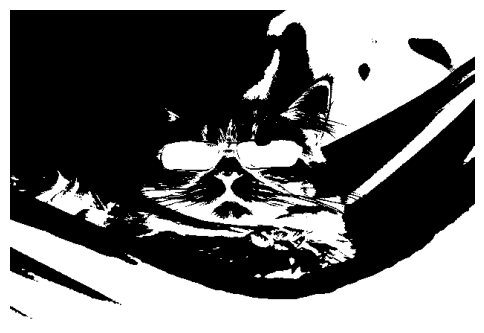

In [5]:
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

## 1б. Создание рамки в виде эллипса

In [6]:
l_x, l_y = image.shape[:2]
X, Y = np.ogrid[:l_x, :l_y]
ellipse_mask = ((X - l_x / 2) ** 2) / (l_x / 2) ** 2 + ((Y - l_y / 2) ** 2) / (l_y / 2) ** 2 > 1
binary_image[ellipse_mask] = 0 

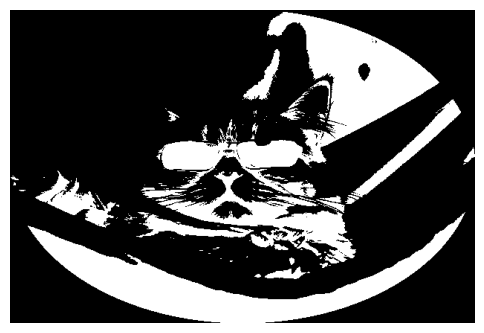

In [7]:
plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

## 2a, 2b Homographies

In [8]:
import numpy as np
from skimage import transform, img_as_float
import matplotlib.pyplot as plt
from skimage import data

def apply_affine_transform(image, scale=1, rotation=0, shear=0, translation=(0, 0)):
    tform = transform.AffineTransform(scale=scale, rotation=rotation, shear=shear, translation=translation)
    
    transformed_image = transform.warp(image, tform.inverse)
    
    return transformed_image

def show_image(image, title='Image'):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


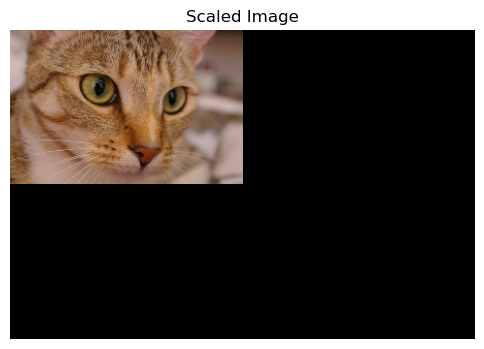

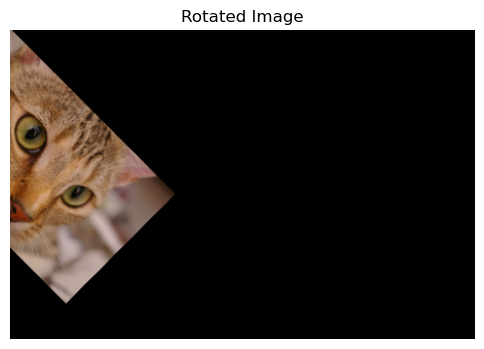

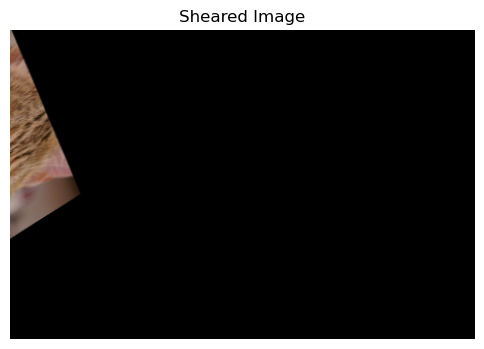

In [9]:
image = img_as_float(data.chelsea())

scaled_image = apply_affine_transform(image, scale=0.5)
rotated_image = apply_affine_transform(scaled_image, rotation=np.pi / 4)
sheared_image = apply_affine_transform(rotated_image, shear=np.pi / 6)

show_image(scaled_image, 'Scaled Image')
show_image(rotated_image, 'Rotated Image')
show_image(sheared_image, 'Sheared Image')

## 3а Снимки

In [10]:
import matplotlib.pyplot as plt

image0 = io.imread('0.jpg')
image1 = io.imread('1.jpg')
image2 = io.imread('2.jpg')
image3 = io.imread('3.jpg')

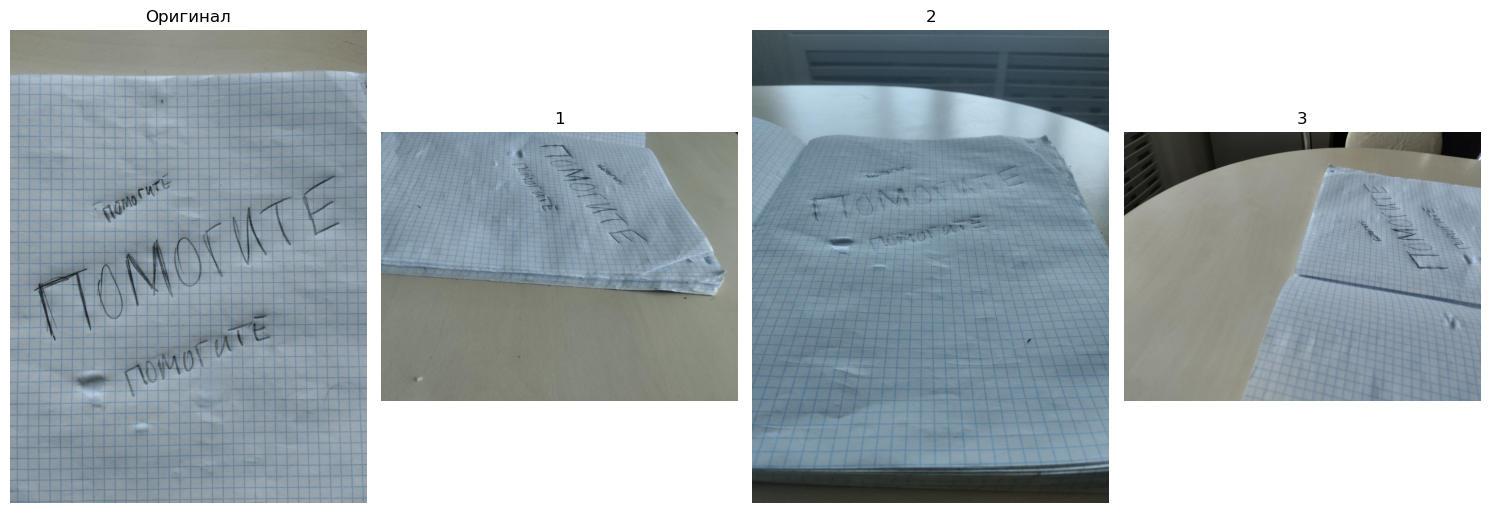

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(15, 15))

axs[0].imshow(image0)
axs[0].set_title("Оригинал")
axs[1].imshow(image1)
axs[1].set_title("1")
axs[2].imshow(image2)
axs[2].set_title("2")
axs[3].imshow(image3)
axs[3].set_title("3")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

## 3b Восстановление

### hardcoded

In [12]:
dst1 = np.array([[ 895.10606061,  57.92424242],
                 [ 378.67748918,  13.58441558],
                 [ 535.17099567, 402.20995671],
                 [1072.46536797, 436.11688312]])

dst2 = np.array([[169.81168831, 326.42640693],
                 [ 79.76839827, 603.48268398],
                 [789.72510823, 603.48268398],
                 [744.7034632,  322.96320346]])

dst3 = np.array([[ 717.74675325,  454.37445887],
                 [1260.25757576,  543.05411255],
                 [1176.79437229,  198.76839827],
                 [ 777.73593074,  154.42857143]])

### Чтобы интерактивно выбрать точки нужен этот magic с PyQt5. При запуске select_points откроется интерактивное окно Python на taskbar (раскомментировать ниже)

In [16]:
def select_points(image, num_points=4):
    plt.imshow(image)
    plt.title(f'Выберите {num_points} контрольные точки (верх лево->низ лево->низ право->верх право')
    points = plt.ginput(num_points)
    plt.show()
    plt.close()
    return np.array(points)

In [ ]:
!pip install PyQt5 --no-cache-dir 

In [ ]:
%matplotlib qt

In [ ]:
print("Выберите точки для изображения 1:")
src1 = select_points(image1)

print("Выберите точки для изображения 2:")
src2 = select_points(image2)

print("Выберите точки для изображения 3:")
src3 = select_points(image3)

In [ ]:
print(f"src1 = {src1}")
print(f"src2 = {src2}")
print(f"src3 = {src3}")

### Идём далее

In [13]:
src = np.array([[0, 0], [0, 500], [500, 500], [500, 0]])

In [14]:
tform1 = transform.ProjectiveTransform()
tform1.estimate(src, dst1)
warped1 = transform.warp(image1, tform1, output_shape=(image0.shape[0], image0.shape[1]))

tform2 = transform.ProjectiveTransform()
tform2.estimate(src, dst2)
warped2 = transform.warp(image2, tform2, output_shape=(image0.shape[0], image0.shape[1]))

tform3 = transform.ProjectiveTransform()
tform3.estimate(src, dst3)
warped3 = transform.warp(image3, tform3, output_shape=(image0.shape[0], image0.shape[1]))

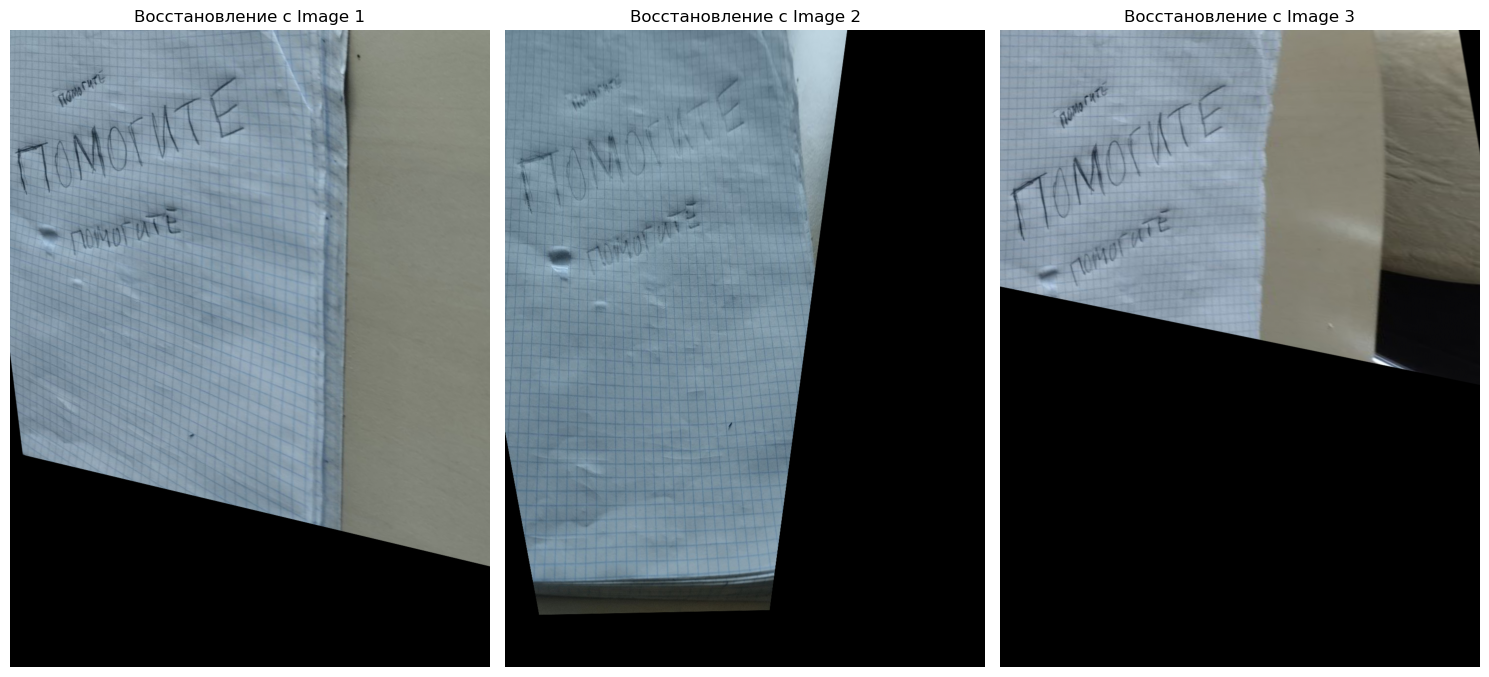

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].imshow(warped1)
axs[0].set_title("Восстановление с Image 1")

axs[1].imshow(warped2)
axs[1].set_title("Восстановление с Image 2")

axs[2].imshow(warped3)
axs[2].set_title("Восстановление с Image 3")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

## 3в Вывод

Ракурсы были под большим углом

На выходе очень даже читаемо